<h2> Name: Christian Grier

In [20]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpat
from sklearn.decomposition import PCA
from sklearn import preprocessing
DATA = Path("C:/Users/chris/Documents/DS 110-DM/data")

In [21]:
cereal_df = pd.read_csv(DATA / "Cereals.csv")
print(type(cereal_df))

<class 'pandas.core.frame.DataFrame'>


<h3>Question 1.a

In [6]:
cereal_df.head()
#Using this we can look at the set of variables for the dataframe. In this case we are presented with a total of 16 variables.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


Variables after type are all quantitative/numerical variables. The variables ranging from calories to cups are all nominal variables with rating being a ordinal variable.

<h3> Question 1.b

In [9]:
pd.DataFrame({'mean': cereal_df.mean(),
              'median': cereal_df.median(),
              'min': cereal_df.min(),
              'max': cereal_df.max(),
              'sd': cereal_df.std()
            })
#This is a sidplay of each variables mean, median, min, max, and standard deviation

,mean,median,min,max,sd
calories,106.883117,110.000000,50,160,19.484119
carbo,14.802632,14.500000,5.0,23.0,3.907326
cups,0.821039,0.750000,0.25,1.5,0.232716
fat,1.012987,1.000000,0,5,1.006473
fiber,2.151948,2.000000,0.0,14.0,2.383364
mfr,NaN,NaN,A,R,NaN
name,NaN,NaN,100%_Bran,Wheaties_Honey_Gold,NaN
potass,98.666667,90.000000,15.0,330.0,70.410636
protein,2.545455,3.000000,1,6,1.094790
rating,42.665705,40.400208,18.042851,93.704912,14.047289


<h3>Question 1.c

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='calories', ylabel='Count'>

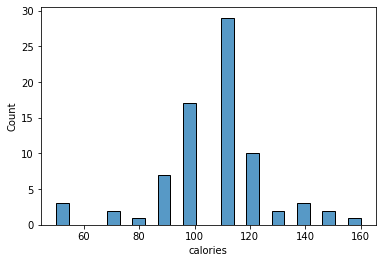

In [20]:
sns.histplot(x='calories', data=cereal_df)

<AxesSubplot:xlabel='protein', ylabel='Count'>

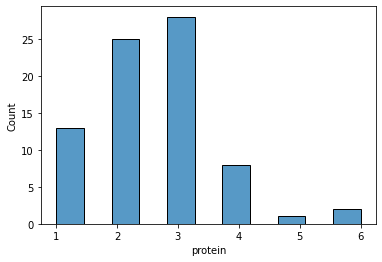

In [21]:
sns.histplot(x='protein', data=cereal_df)

<AxesSubplot:xlabel='fat', ylabel='Count'>

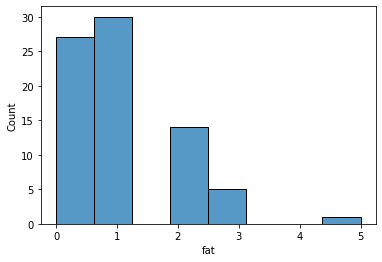

In [22]:
sns.histplot(x='fat', data=cereal_df)

<AxesSubplot:xlabel='sodium', ylabel='Count'>

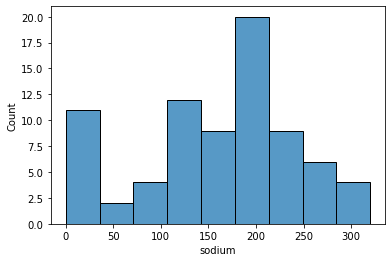

In [23]:
sns.histplot(x='sodium', data=cereal_df)

<AxesSubplot:xlabel='fiber', ylabel='Count'>

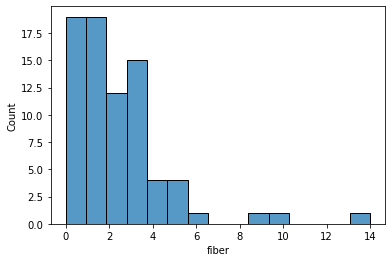

In [24]:
sns.histplot(x='fiber', data=cereal_df)

<AxesSubplot:xlabel='carbo', ylabel='Count'>

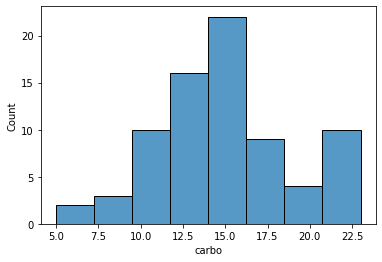

In [25]:
sns.histplot(x='carbo', data=cereal_df)

<AxesSubplot:xlabel='sugars', ylabel='Count'>

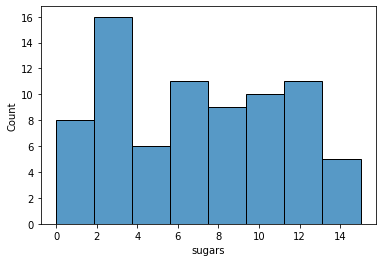

In [26]:
sns.histplot(x='sugars', data=cereal_df)

<AxesSubplot:xlabel='potass', ylabel='Count'>

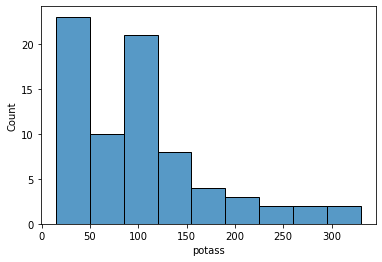

In [27]:
sns.histplot(x='potass', data=cereal_df)

<AxesSubplot:xlabel='vitamins', ylabel='Count'>

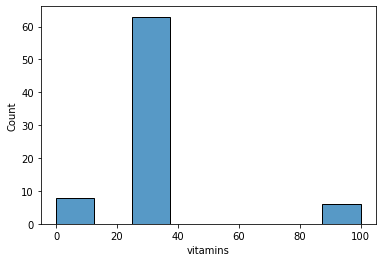

In [28]:
sns.histplot(x='vitamins', data=cereal_df)

<AxesSubplot:xlabel='shelf', ylabel='Count'>

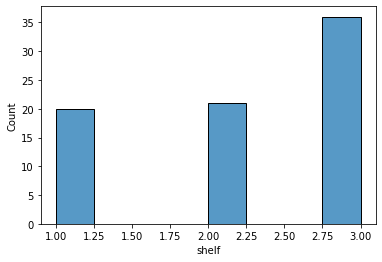

In [29]:
sns.histplot(x='shelf', data=cereal_df)

<AxesSubplot:xlabel='weight', ylabel='Count'>

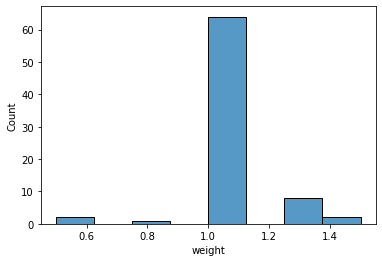

In [31]:
sns.histplot(x='weight', data=cereal_df)

<AxesSubplot:xlabel='cups', ylabel='Count'>

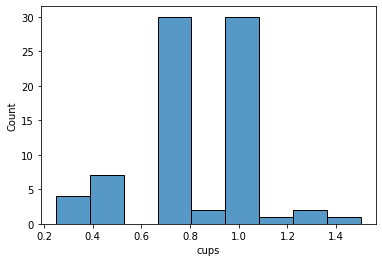

In [32]:
sns.histplot(x='cups', data=cereal_df)

<AxesSubplot:xlabel='rating', ylabel='Count'>

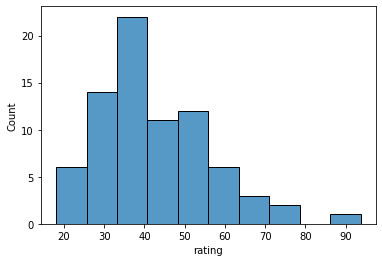

In [34]:
sns.histplot(x='rating', data=cereal_df)

i. After comparing each histogram we can see that sodium and potass as the largest amount of variance. 
<br>
ii. In terms of the most skewed variables, that would be between potass and fiber which both have a right skewed histogram
<br>
ii. In terms of extreme values, I can see is the few accounts of nearly 100 for vitamins and the 14 count on fiber

<h3> Question 1.d

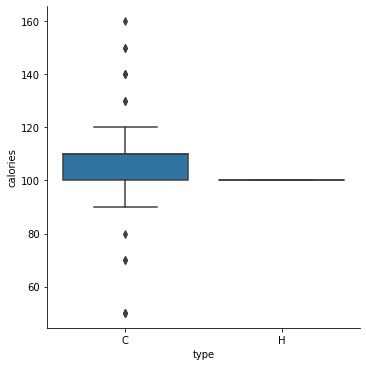

In [42]:
ax = sns.catplot(x="type", y="calories", kind="box", data=cereal_df)

This plot shows us the range of calories dependent on the type of cereal, that being either cold or hot. In our case we can see that the hot cereal does not have a distribution of calories and all instances of hot cereal are 100 calories.

<h3>Question 1.e

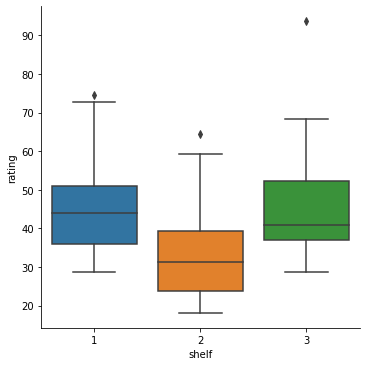

In [43]:
ax = sns.catplot(x="shelf", y="rating", kind="box", data=cereal_df)

Keeping all three shelf heights does give us the most information when compared to ratings, but the real comparison could be done by looking at the 1 and 3 shelves.

<h3>Question 1.f

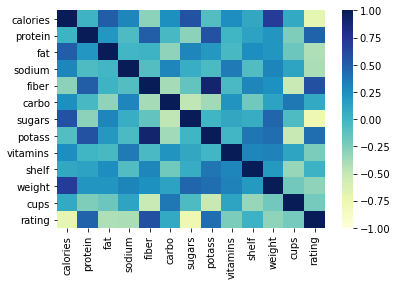

In [52]:
cereal_corr = cereal_df.corr()
#we are utilizing the corr() function to see correlation between variables
ax = sns.heatmap(cereal_corr, vmin=-1, vmax=1, cmap="YlGnBu")

i. Fiber and potass are the two most correlated variables.
<br>
ii. We can reduce the number of variables by removing one variable from a highly correlated pair. 
<br>
iii. If we normalize this data we would most likely be met with a a different correlation. This is because the variables are not all measured in the same units so by changing to a uniform measurement it could alter the correlation. 

<h3> Question 1.g

The first PC repreesents a correlation between the original variables. Every PC shows correlation to the variables, with some showing stonger correlation to different variables. In our case the first PC shows a strong negative correlation to sodium. 

<h3> Question 2.a

In [24]:
university_df = pd.read_csv(DATA / "Universities.csv")
print(university_df.dtypes)

College Name                 object
State                        object
Public (1)/ Private (2)       int64
# appli. rec'd              float64
# appl. accepted            float64
# new stud. enrolled        float64
% new stud. from top 10%    float64
% new stud. from top 25%    float64
# FT undergrad              float64
# PT undergrad              float64
in-state tuition            float64
out-of-state tuition        float64
room                        float64
board                       float64
add. fees                   float64
estim. book costs           float64
estim. personal $           float64
% fac. w/PHD                float64
stud./fac. ratio            float64
Graduation rate             float64
dtype: object


<h3> Question 2.b

<h3>Question 3.a

In [29]:
Toyota_df = pd.read_csv(DATA / "ToyotaCorolla.csv")
print(Toyota_df.dtypes)

Id                   float64
Model                 object
Price                float64
Age_08_04            float64
Mfg_Month            float64
Mfg_Year             float64
KM                   float64
Fuel_Type             object
HP                   float64
Met_Color            float64
Color                 object
Automatic            float64
CC                   float64
Doors                float64
Cylinders            float64
Gears                float64
Quarterly_Tax        float64
Weight               float64
Mfr_Guarantee        float64
BOVAG_Guarantee      float64
Guarantee_Period     float64
ABS                  float64
Airbag_1             float64
Airbag_2             float64
Airco                float64
Automatic_airco      float64
Boardcomputer        float64
CD_Player            float64
Central_Lock         float64
Powered_Windows      float64
Power_Steering       float64
Radio                float64
Mistlamps            float64
Sport_Model          float64
Backseat_Divid

The categorical variables are Model, Fuel_Type, and Color

<h3> Question 3.b

The relationship between a categorical variable and the derived binary dummy variables are that they represent a 0 or a 1 for true or false of that category. If a categorical variable has 2 choices then two binary dummies could be made to represent which choice was made.

<h3> Question 3.c

N or N-1 binary dummy variables is required to capture the information of a categorical variable with N categories.

<h3> Question 3.d

In [30]:
Toyota_df = pd.get_dummies(Toyota_df, prefix_sep='_', drop_first=True)

In [34]:
Toyota_df.head(5)

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1.0,13500.0,23.0,10.0,2002.0,46986.0,90.0,1.0,0.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2.0,13750.0,23.0,10.0,2002.0,72937.0,90.0,1.0,0.0,2000.0,...,0,0,0,0,0,0,1,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


Look at the new dummy variables created for the categorical variable, we can see that Color_Blue was created for Color. This dummy variables shows a 0 or a 1. A 0 represents a no and a 1 represents a yes. For this instance the only 1 we would see is the Color_Blue because the categorical variable had listed Blue as the data. 

<h3> Question 3.e

In [35]:
Toyota_df.corr().round(2)

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
Id,1.00,-0.74,0.91,0.04,-0.92,0.27,-0.11,-0.08,0.07,-0.12,...,0.16,-0.02,-0.00,0.08,-0.10,0.07,-0.04,0.00,0.04,-0.04
Price,-0.74,1.00,-0.88,-0.02,0.89,-0.57,0.31,0.11,0.03,0.13,...,-0.04,0.03,0.01,-0.10,0.17,-0.10,0.03,-0.02,-0.10,0.02
Age_08_04,0.91,-0.88,1.00,-0.12,-0.98,0.51,-0.16,-0.11,0.03,-0.10,...,0.09,-0.02,-0.03,0.10,-0.14,0.10,-0.03,0.02,0.05,-0.04
Mfg_Month,0.04,-0.02,-0.12,1.00,-0.06,-0.02,-0.04,0.03,0.01,0.04,...,-0.05,0.01,0.06,-0.03,-0.03,0.01,-0.02,-0.03,-0.00,0.00
Mfg_Year,-0.92,0.89,-0.98,-0.06,1.00,-0.50,0.16,0.10,-0.03,0.09,...,-0.08,0.02,0.02,-0.10,0.14,-0.10,0.03,-0.01,-0.05,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Color_Red,0.07,-0.10,0.10,0.01,-0.10,0.05,0.01,-0.26,-0.03,-0.01,...,0.29,-0.09,-0.11,-0.09,-0.11,1.00,-0.07,-0.01,-0.03,-0.01
Color_Silver,-0.04,0.03,-0.03,-0.02,0.03,0.01,0.01,0.10,0.05,-0.00,...,0.18,-0.06,-0.07,-0.06,-0.07,-0.07,1.00,-0.01,-0.02,-0.01
Color_Violet,0.00,-0.02,0.02,-0.03,-0.01,0.02,-0.01,0.04,-0.01,-0.02,...,0.04,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1.00,-0.00,-0.00
Color_White,0.04,-0.10,0.05,-0.00,-0.05,0.13,-0.09,-0.20,-0.04,0.03,...,0.04,-0.03,-0.03,-0.03,-0.04,-0.03,-0.02,-0.00,1.00,-0.00


There are many different assumptions we can see with the matrix table. <br>
-Age and Price have a inverse correlations that is strong showing that as the car age goes up the price of the car goes down. <br>
-Mfg_Year and Price have a strong positive correlation showing that as the year of manufacturing increases or the newer a car the more the price of the car is. <br>
-Price and KM has a negative correlation showing that as KM goes up the price of car goes up. 

<h3> Question 4.a

The "Proportion of Variance" is so much higher in PC1 because that is partially the nature of PCA. The PC1 will always be larger than PC2 and so on. This is because the PC1 shows the largest measure of variance in the dataset. 

<h3> Question 4.b

When it comes to normalizing the data, this data set need normalization as we can see the bottom of the PC1 for Proline is nearly 1 and this is because of the weight of that specific variable. 